# Brain MRI Detection using different Machine Learning Models

## Team Members
- Mohammad Ali Zahir - ID: 40077619
- Marwa Khalid - ID: 40155098

## Required Librairies
**Run the cell below to install all the required libraries.**

In [11]:
import matplotlib.pyplot as plt 
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier




# Displaying Data

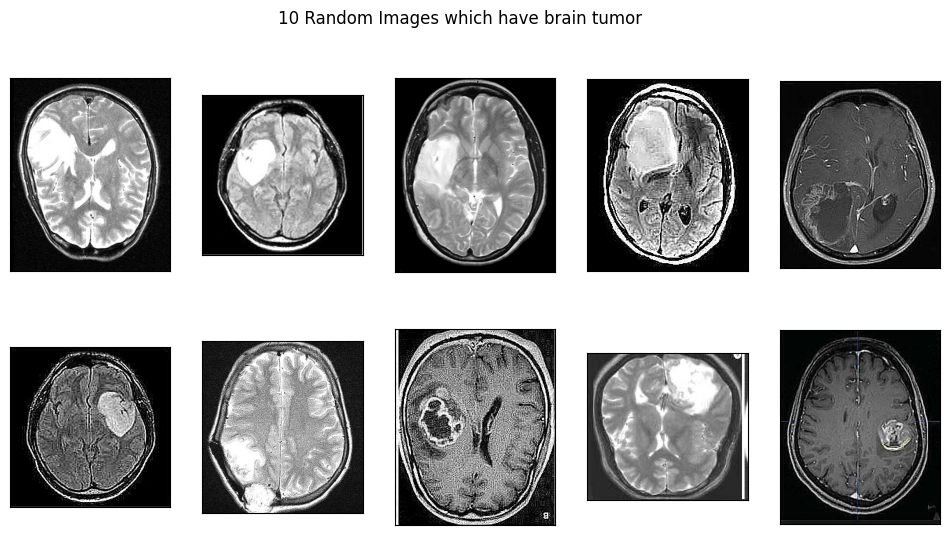

In [2]:
import os
import random
import matplotlib.pyplot as plt

folder_path = "data/yes"
image_list = os.listdir(folder_path)
random_images = random.sample(image_list, 10)

image_data = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image_path = os.path.join(folder_path, random_images[i])
    img = plt.imread(image_path)
    image_data.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Images which have brain tumor")
plt.show()




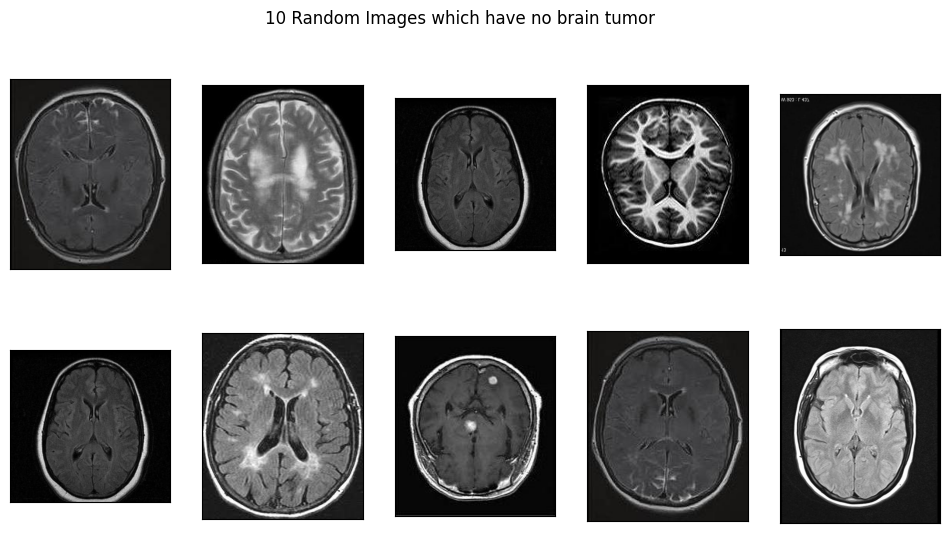

In [3]:
import os
import random
import matplotlib.pyplot as plt

folder_path = "data/no"
image_list = os.listdir(folder_path)
random_images = random.sample(image_list, 10)

image_data = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image_path = os.path.join(folder_path, random_images[i])
    img = plt.imread(image_path)
    image_data.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Images which have no brain tumor")
plt.show()




# Normalizing and training the data

In [4]:
data_folder = "data"
image_extensions = [".jpg", ".jpeg"]  # List of image extensions

# Get list of files in the folders
yes_folder = os.path.join(data_folder, "yes")
yes_files = [os.path.join(yes_folder, f) for f in os.listdir(yes_folder) if os.path.splitext(f)[1].lower() in image_extensions]

no_folder = os.path.join(data_folder, "no")
no_files = [os.path.join(no_folder, f) for f in os.listdir(no_folder) if os.path.splitext(f)[1].lower() in image_extensions]

# Combine the lists of files and create target labels
image_files = yes_files + no_files
target = np.concatenate([np.ones(len(yes_files)), np.zeros(len(no_files))])

# Shuffle and split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(image_files, target, test_size=0.2, random_state=42)


def load_images(image_list):
    images = []
    for image_path in image_list:
        img = plt.imread(image_path)
        img_resized = resize(img, (150, 150, 3))  # Resize to (150, 150, 3) shape
        img_norm = img_resized / 255.0  # Normalize to [0, 1] range
        images.append(img_norm)
    return np.array(images)



In [5]:
X_train_images = load_images(X_train)
X_test_images = load_images(X_test)


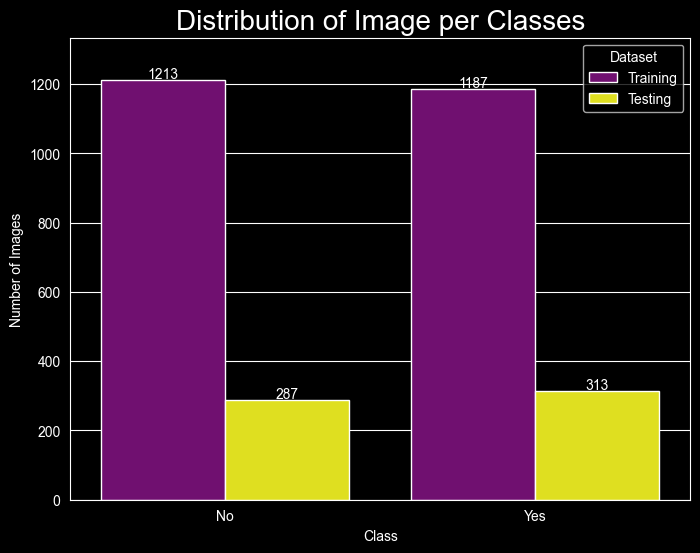

In [9]:
# Count the number of images for each class in the training and testing datasets
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True)

# Combine the count values into a single data frame
counts_df = pd.DataFrame({
    "Class": ["No", "Yes"],
    "Training": train_counts[1],
    "Testing": test_counts[1]
})

# Melt the data frame into a long format
counts_melt = counts_df.melt(id_vars=["Class"], var_name="Dataset", value_name="Count")
colors = ["purple", "yellow"]
sns.set_style(style="darkgrid")
plt.style.use("dark_background")
fig = plt.figure(facecolor='black', figsize=(8, 6))

# Create a bar plot with the count values displayed above each bar
ax = sns.barplot(x="Class", y="Count", hue="Dataset", data=counts_melt, palette=colors)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.ylim([0, max(counts_melt["Count"]) * 1.1])
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 5
    ax.text(x, y, str(int(height)), ha="center")

plt.title("Distribution of Image per Classes" , fontdict={'size':20})
plt.show()

# Model 1: Multilayer Perceptron

In [81]:

# Load and normalize the images
X_train_norm = np.array(load_images(X_train))
X_test_norm = np.array(load_images(X_test))

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model for 20 epochs
history = model.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))


Epoch 1/20
75/75 [==============================] - 41s 531ms/step - loss: 0.6930 - accuracy: 0.5192 - val_loss: 0.6909 - val_accuracy: 0.6333
Epoch 2/20
75/75 [==============================] - 40s 528ms/step - loss: 0.5952 - accuracy: 0.6662 - val_loss: 0.5449 - val_accuracy: 0.7150
Epoch 3/20
75/75 [==============================] - 39s 518ms/step - loss: 0.4988 - accuracy: 0.7521 - val_loss: 0.6035 - val_accuracy: 0.6433
Epoch 4/20
75/75 [==============================] - 35s 471ms/step - loss: 0.4697 - accuracy: 0.7821 - val_loss: 0.4897 - val_accuracy: 0.7583
Epoch 5/20
75/75 [==============================] - 35s 464ms/step - loss: 0.4101 - accuracy: 0.8158 - val_loss: 0.4424 - val_accuracy: 0.7917
Epoch 6/20
75/75 [==============================] - 35s 461ms/step - loss: 0.3464 - accuracy: 0.8525 - val_loss: 0.3919 - val_accuracy: 0.8433
Epoch 7/20
75/75 [==============================] - 35s 461ms/step - loss: 0.2896 - accuracy: 0.8879 - val_loss: 0.3277 - val_accuracy: 0.8717

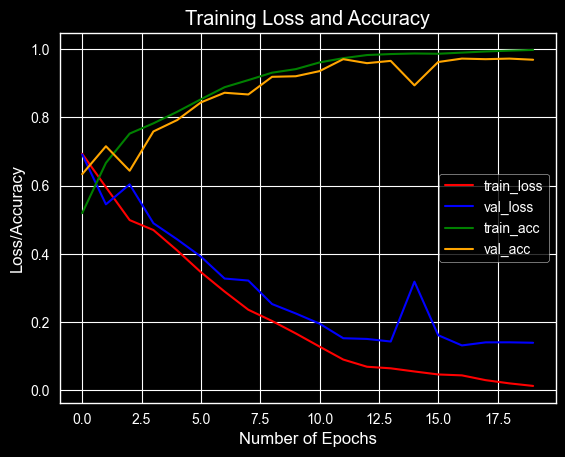

In [103]:
# plot the training loss and accuracy with dark background and dark plot
plt.style.use("dark_background")
fig = plt.figure(facecolor='black')
plt.plot( history.history["loss"], color='red', label="train_loss")
plt.plot( history.history["val_loss"], color='blue', label="val_loss")
plt.plot( history.history["accuracy"], color='green', label="train_acc")
plt.plot( history.history["val_accuracy"], color='orange', label="val_acc")
plt.title("Training Loss and Accuracy", color='white')
plt.xlabel("Number of Epochs", color='white')
plt.ylabel("Loss/Accuracy", color='white')
plt.legend(loc="center right")
plt.show()


# Model 2: K-Means Clustering

In [98]:
# Load and normalize the images
X_train_norm = np.array(load_images(X_train))
X_test_norm = np.array(load_images(X_test))

# Flatten the images
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

# Perform clustering on the training data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_flat)

# Predict the clusters for the test data
y_pred = kmeans.predict(X_test_flat)
y_pred = 1 - y_pred

# Print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
# Convert the dictionary to a pandas dataframe
df_nb = pd.DataFrame(report).transpose()

# Format the values as percentages
df_nb.loc[:, 'precision':'f1-score'] = df_nb.loc[:, 'precision':'f1-score'].applymap(lambda x: f'{x:.2%}')

# Print the dataframe
report_table = tabulate(df_nb.drop('accuracy'), headers='keys',tablefmt="grid",
            stralign="right", numalign="right")
print(report_table)

# Print the clustering accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f"\nK-Means Clustering accuracy: {accuracy:.2f}%")


c:\Users\Ali\miniconda3\envs\471\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
|          0.0 |      58.76% |   75.96% |     66.26% |       287 |
+--------------+-------------+----------+------------+-----------+
|          1.0 |      69.87% |   51.12% |     59.04% |       313 |
+--------------+-------------+----------+------------+-----------+
|    macro avg |      64.31% |   63.54% |     62.65% |       600 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |      64.56% |   63.00% |     62.49% |       600 |
+--------------+-------------+----------+------------+-----------+

K-Means Clustering accuracy: 63.00%


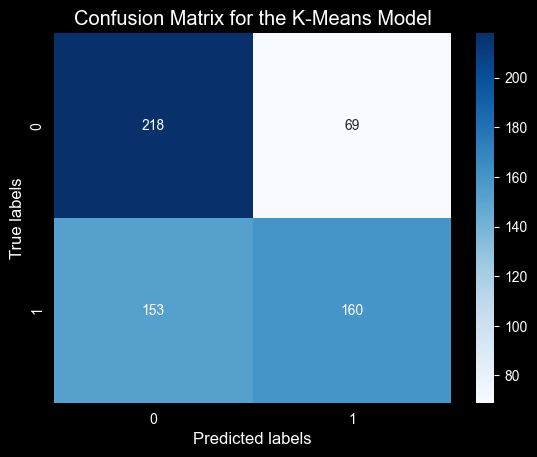

In [110]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set the labels and title of the plot
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for the K-Means Model")

plt.show()


# Model 3: K-Nearest Neighbors

In [12]:
# Load and normalize the images



X_train_norm = np.array(load_images(X_train))
X_test_norm = np.array(load_images(X_test))

# Flatten the images
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

# Perform k-nearest neighbor classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat, y_train)
y_pred = knn.predict(X_test_flat)

# Print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
# Convert the dictionary to a pandas dataframe
df_nb = pd.DataFrame(report).transpose()

# Format the values as percentages
df_nb.loc[:, 'precision':'f1-score'] = df_nb.loc[:, 'precision':'f1-score'].applymap(lambda x: f'{x:.2%}')

# Print the dataframe
report_table = tabulate(df_nb.drop('accuracy'), headers='keys',tablefmt="grid",
            stralign="right", numalign="right")
print(report_table)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nk-Nearest Neighbor accuracy: {accuracy:.2f}%")


+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
|          0.0 |      77.78% |   97.56% |     86.55% |       287 |
+--------------+-------------+----------+------------+-----------+
|          1.0 |      97.08% |   74.44% |     84.27% |       313 |
+--------------+-------------+----------+------------+-----------+
|    macro avg |      87.43% |   86.00% |     85.41% |       600 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |      87.85% |   85.50% |     85.36% |       600 |
+--------------+-------------+----------+------------+-----------+

k-Nearest Neighbor accuracy: 85.50%


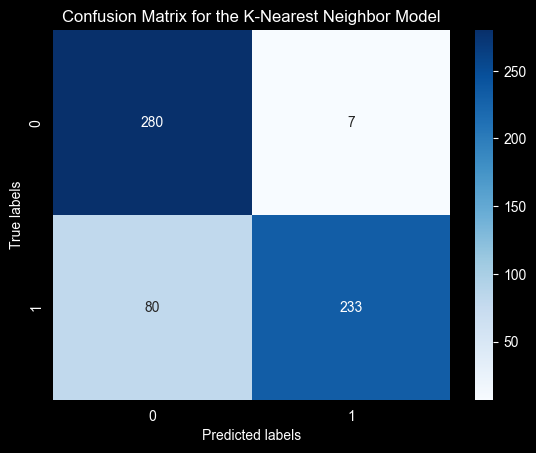

In [13]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set the labels and title of the plot
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for the K-Nearest Neighbor Model")

plt.show()
